# Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 93s 1us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

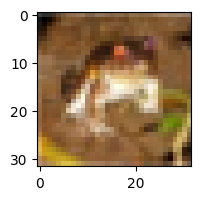

In [7]:
plt.figure(figsize= (15,2))
plt.imshow(X_train[0])

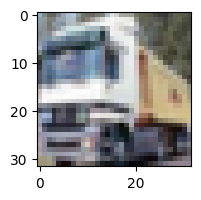

In [10]:
plt.figure(figsize= (15,2))
plt.imshow(X_train[1])

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

# this we make 2-D array into 1_D array

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
classes[9]

'truck'

In [17]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

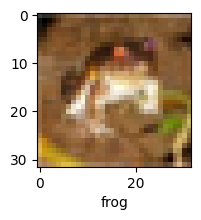

In [18]:
plot_sample(X_train, y_train, 0)

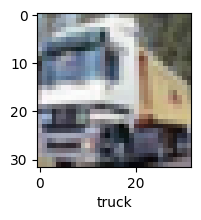

In [19]:
plot_sample(X_train, y_train, 1)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\DHRUV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 36ms/step - accuracy: 0.3088 - loss: 1.9218
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4179 - loss: 1.6421
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4523 - loss: 1.5521
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.4803 - loss: 1.4875
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4928 - loss: 1.4404


In [22]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4865 - loss: 1.4603


[1.463466763496399, 0.48159998655319214]

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.40      0.51      1000
           1       0.60      0.61      0.61      1000
           2       0.43      0.32      0.36      1000
           3       0.36      0.28      0.31      1000
           4       0.48      0.38      0.43      1000
           5       0.33      0.53      0.41      1000
           6       0.56      0.48      0.52      1000
           7       0.63      0.45      0.52      1000
           8       0.59      0.65      0.62      1000
           9       0.40      0.72      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\DHRUV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.3908 - loss: 1.6772
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6034 - loss: 1.1273
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6583 - loss: 0.9851
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6953 - loss: 0.8816
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7241 - loss: 0.7999
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7442 - loss: 0.7429
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7610 - loss: 0.6883
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.7834 - loss: 0.6252
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7956 - loss: 0.5910
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8057 - loss: 0.5581


In [27]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6994 - loss: 0.9386


[0.9390771389007568, 0.6976000070571899]

In [28]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

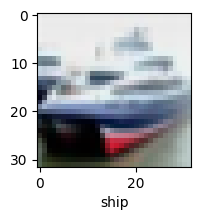

In [29]:
plot_sample(X_test, y_test, 1)

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[1.52345048e-03, 3.04297224e-04, 6.08333328e-04, 8.94662142e-01,
        4.05364146e-04, 8.48747268e-02, 1.70891136e-02, 1.91160234e-05,
        4.27175692e-04, 8.63199675e-05],
       [2.81862449e-05, 2.79237777e-02, 1.04715355e-07, 4.64760177e-08,
        2.87287083e-09, 3.67528497e-09, 5.89347515e-10, 2.17351651e-10,
        9.71981883e-01, 6.60560254e-05],
       [5.64728975e-02, 2.21320719e-01, 3.97731457e-03, 9.65855923e-03,
        4.60684059e-05, 1.40531454e-03, 3.08905030e-04, 3.58150224e-04,
        6.25384212e-01, 8.10678750e-02],
       [8.09365869e-01, 4.94750217e-03, 2.67932587e-03, 4.61906428e-03,
        1.26809784e-04, 1.72921682e-05, 1.97325353e-05, 3.70557478e-04,
        1.77113578e-01, 7.40237650e-04],
       [1.01877731e-06, 7.48309787e-07, 2.04700679e-02, 3.28006983e-01,
        4.23404813e-01, 2.93458509e-03, 2.25135431e-01, 1.27314377e-06,
        4.40457297e-05, 1.01986211e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [36]:
y_test[:5] # in this there was a error at 4th one place in array. our actually value is 4 but it give us 6. 

array([3, 8, 8, 0, 6], dtype=uint8)

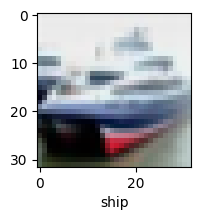

In [37]:
plot_sample(X_test, y_test, 1)

In [38]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [39]:
classes[y_classes[1]]

'ship'

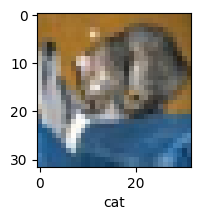

In [40]:
plot_sample(X_test, y_test, 0)

In [41]:
classes[y_classes[0]]

'cat'

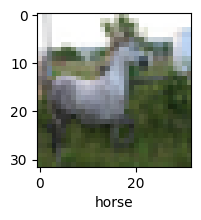

In [48]:
plot_sample(X_test, y_test, 69)

In [50]:
classes[y_classes[69]]  # here we can see that the wrong prediction

'truck'

In [51]:
print("Classification Report: /n", classification_report(y_test, y_classes))

Classification Report: /n               precision    recall  f1-score   support

           0       0.79      0.64      0.71      1000
           1       0.86      0.80      0.83      1000
           2       0.61      0.57      0.59      1000
           3       0.49      0.52      0.50      1000
           4       0.71      0.54      0.62      1000
           5       0.61      0.61      0.61      1000
           6       0.67      0.84      0.75      1000
           7       0.74      0.77      0.75      1000
           8       0.79      0.84      0.81      1000
           9       0.73      0.85      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

